In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from numpy.lib.stride_tricks import as_strided

from smdl import SMDL
from model import Norm1D, Poisson1D
from data_generator import SingleJumpingMeanGenerator, SingleJumpingVarianceGenerator, \
                           SingleJumpingMeanVarianceGenerator, \
                           MultipleJumpingMeanGenerator, MultipleJumpingVarianceGenerator, \
                           MultipleGradualMeanGenerator, MultipleGradualVarianceGenerator, \
                           MyMultipleGradualMeanGenerator
from evaluator import BenefitFalseAlarmEvaluator
#import changefinder

from sklearn.metrics import auc

import sys

In [3]:
def calc_score(x, h=100, T=1000, mu_max=2.0, sigma_min=1.0, beta=1.0):
    # stride data
    x_strided = as_strided(x, (T-2*h, 2*h), (8, 8))
    # model
    model = Norm1D(h, T)
    # sequential MDL-change detection algorithm
    smdl = SMDL(h, T, model, beta)
    score = []
    for i in range(x_strided.shape[0]):
        score_i = smdl.calc_change_score(x_strided[i, :], mu_max, sigma_min)
        score.append(score_i)

    return score

In [4]:
def calc_auc(score, h=100, tol_delay=200, t_change=[500]):
    t_change = np.array(t_change)
    evaluator = BenefitFalseAlarmEvaluator()
    total_benefit = []
    num_false_alarm = []
    for beta in np.linspace(np.min(score), np.max(score), 100):
        tb, nfa = evaluator.evaluate(score, tol_delay, t_change, h, beta)
        total_benefit.append(tb)
        num_false_alarm.append(nfa)

    total_benefit_npa = np.array(total_benefit)
    num_false_alarm_npa = np.array(num_false_alarm)

    tpr = total_benefit_npa / np.max(total_benefit_npa)
    if not np.all(num_false_alarm_npa == 0.0):
        fpr = num_false_alarm_npa / np.max(num_false_alarm_npa)
    else:
        tpr = np.hstack((1.0, tpr))
        fpr = np.hstack((1.0, num_false_alarm_npa))

    print(auc(fpr[::-1], tpr[::-1]))

In [5]:
def test_single(h=100, T=1000, beta=0.5):
    # generate data
    # single mean-changing dataset
    gen_single_mean = SingleJumpingMeanGenerator()
    delta_mu = 0.5
    x = gen_single_mean.generate(T, delta_mu)
    mu_max = 2.0
    sigma_min = 1.0

    """
    # single variance-changing dataset
    gen_single_var = SingleJumpingVarianceGenerator()
    log_delta = 1.0
    x = gen_single_var.generate(T, log_delta)
    mu_max = 1.0
    sigma_min = np.exp(0.25)
    """

    """
    # single mean-variance-changing dataset
    gen_single_mean_var = SingleJumpingMeanVarianceGenerator()
    delta_mu = 0.5
    log_delta = 0.25
    x = gen_single_mean_var.generate(T, delta_mu, log_delta)
    mu_max = 2.0
    sigma_min = np.exp(0.25)
    """

    tol_delay = 200
    t_change = 500
    score = calc_score(x, h, T, mu_max, sigma_min)
    calc_auc(score, h, tol_delay, t_change)

    return x, score

In [6]:
def test_multiple(h=100, T=10000, beta=0.5):
    # generate data
    t_change = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]

    # multiple jumping mean-changing dataset
    gen_multi_mean = MultipleJumpingMeanGenerator()
    x = gen_multi_mean.generate(T)
    mu_max = 2.0
    sigma_min = 1.0

    """
    # multiple jumping variance-changing dataset
    gen_multi_var = MultipleJumpingVarianceGenerator()
    x = gen_multi_var.generate(T)
    mu_max = 1.0
    sigma_min = np.exp(0.25)
    """

    """
    # multiple gradual mean-changing dataset
    gen_multi_mean = MultipleGradualMeanGenerator()
    x = gen_multi_mean.generate(T)
    mu_max = 2.0
    sigma_min = 1.0
    """

    """
    # multiple gradual variance-changing dataset
    gen_multi_var = MultipleGradualVarianceGenerator()
    x = gen_multi_var.generate(T)
    mu_max = 1.0
    sigma_min = np.exp(0.25)
    """

    tol_delay = 200
    score = calc_score(x, h, T, mu_max, sigma_min)
    calc_auc(score, h, tol_delay, t_change)
    
    return x, score

## single mean-changing dataset

### $\delta_{\mu} = 0.5$

### h=100

In [7]:
h=100
T=1000
beta=0.5

gen_single_mean = SingleJumpingMeanGenerator()
delta_mu = 0.5
x = gen_single_mean.generate(T, delta_mu)
mu_max = 2.0
sigma_min = 1.0

tol_delay = 200
t_change = 500
score = calc_score(x, h, T, mu_max, sigma_min)
calc_auc(score, h, tol_delay, t_change)

0.741338012375


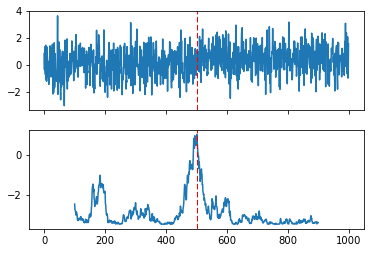

In [8]:
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(x)
axes[0].axvline(500, color='red', linestyle='--', linewidth=1.0)
axes[1].plot(np.array(h*[np.nan] + score + h*[np.nan]))
axes[1].axvline(500, color='red', linestyle='--', linewidth=1.0)
plt.show()

### h=150

In [9]:
h=150
T=1000
beta=0.5

gen_single_mean = SingleJumpingMeanGenerator()
delta_mu = 0.5
x = gen_single_mean.generate(T, delta_mu)
mu_max = 2.0
sigma_min = 1.0

tol_delay = 200
t_change = 500
score = calc_score(x, h, T, mu_max, sigma_min)
calc_auc(score, h, tol_delay, t_change)

0.922132583333


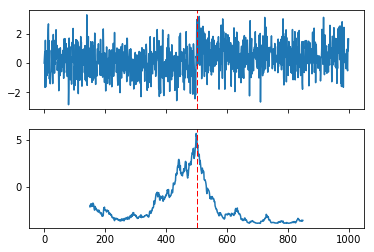

In [10]:
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(x)
axes[0].axvline(500, color='red', linestyle='--', linewidth=1.0)
axes[1].plot(np.array(h*[np.nan] + score + h*[np.nan]))
axes[1].axvline(500, color='red', linestyle='--', linewidth=1.0)
plt.show()

### h=200

In [11]:
h=200
T=1000
beta=0.5

gen_single_mean = SingleJumpingMeanGenerator()
delta_mu = 0.5
x = gen_single_mean.generate(T, delta_mu)
mu_max = 2.0
sigma_min = 1.0

tol_delay = 200
t_change = 500
score = calc_score(x, h, T, mu_max, sigma_min)
calc_auc(score, h, tol_delay, t_change)

0.9237429375


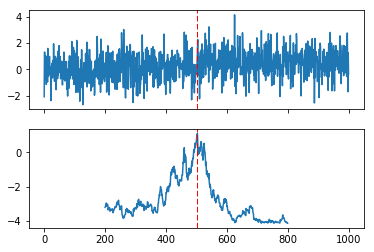

In [12]:
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(x)
axes[0].axvline(500, color='red', linestyle='--', linewidth=1.0)
axes[1].plot(np.array(h*[np.nan] + score + h*[np.nan]))
axes[1].axvline(500, color='red', linestyle='--', linewidth=1.0)
plt.show()

### h=300

In [13]:
h=300
T=1000
beta=0.5

gen_single_mean = SingleJumpingMeanGenerator()
delta_mu = 0.5
x = gen_single_mean.generate(T, delta_mu)
mu_max = 2.0
sigma_min = 1.0

tol_delay = 200
t_change = 500
score = calc_score(x, h, T, mu_max, sigma_min)
calc_auc(score, h, tol_delay, t_change)

0.999099954998


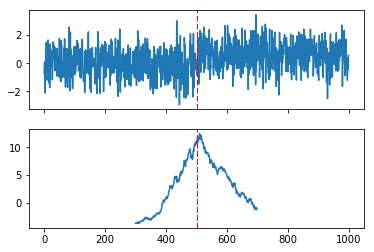

In [14]:
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(x)
axes[0].axvline(500, color='red', linestyle='--', linewidth=1.0)
axes[1].plot(np.array(h*[np.nan] + score + h*[np.nan]))
axes[1].axvline(500, color='red', linestyle='--', linewidth=1.0)
plt.show()

### h=400

In [15]:
h=400
T=1000
beta=0.5

gen_single_mean = SingleJumpingMeanGenerator()
delta_mu = 0.5
x = gen_single_mean.generate(T, delta_mu)
mu_max = 2.0
sigma_min = 1.0

tol_delay = 200
t_change = 500
score = calc_score(x, h, T, mu_max, sigma_min)
calc_auc(score, h, tol_delay, t_change)

1.0


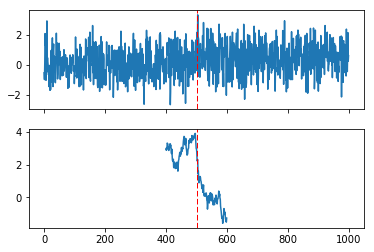

In [16]:
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(x)
axes[0].axvline(500, color='red', linestyle='--', linewidth=1.0)
axes[1].plot(np.array(h*[np.nan] + score + h*[np.nan]))
axes[1].axvline(500, color='red', linestyle='--', linewidth=1.0)
plt.show()

## single variance-changing dataset

### $\log{\Delta} = 0.25$

In [17]:
h = 100
T = 1000
beta = 0.5

gen_single_var = SingleJumpingVarianceGenerator()
log_delta = 0.25
x = gen_single_var.generate(T, log_delta)
mu_max = 1.0
sigma_min = np.exp(0.25)

tol_delay = 200
t_change = 500
score = calc_score(x, h, T, mu_max, sigma_min)
calc_auc(score, h, tol_delay, t_change)

0.7188595


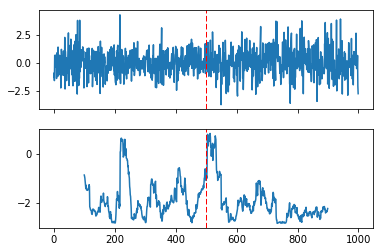

In [18]:
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(x)
axes[0].axvline(500, color='red', linestyle='--', linewidth=1.0)
axes[1].plot(np.array(h*[np.nan] + score + h*[np.nan]))
axes[1].axvline(500, color='red', linestyle='--', linewidth=1.0)
plt.show()

### $\log{\Delta} = 0.5$

In [19]:
h = 100
T = 1000
beta = 0.5

gen_single_var = SingleJumpingVarianceGenerator()
log_delta = 0.5
x = gen_single_var.generate(T, log_delta)
mu_max = 1.0
sigma_min = np.exp(0.25)

tol_delay = 200
t_change = 500
score = calc_score(x, h, T, mu_max, sigma_min)
calc_auc(score, h, tol_delay, t_change)

0.745259536922


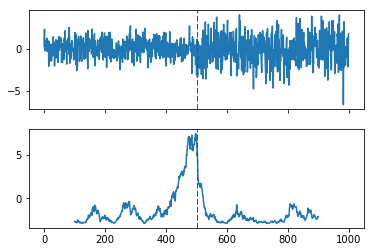

In [20]:
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(x)
axes[0].axvline(500, color='red', linestyle='--', linewidth=1.0)
axes[1].plot(np.array(h*[np.nan] + score + h*[np.nan]))
axes[1].axvline(500, color='red', linestyle='--', linewidth=1.0)
plt.show()

### $\log{\Delta} = 1.0$

In [21]:
h = 100
T = 1000
beta = 0.5

gen_single_var = SingleJumpingVarianceGenerator()
log_delta = 1.0
x = gen_single_var.generate(T, log_delta)
mu_max = 1.0
sigma_min = np.exp(0.25)

tol_delay = 200
t_change = 500
score = calc_score(x, h, T, mu_max, sigma_min)
calc_auc(score, h, tol_delay, t_change)

0.8044601875


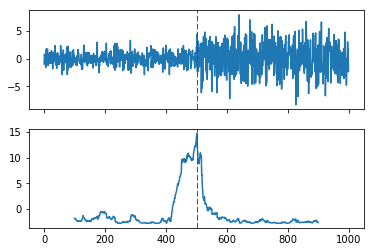

In [22]:
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(x)
axes[0].axvline(500, color='red', linestyle='--', linewidth=1.0)
axes[1].plot(np.array(h*[np.nan] + score + h*[np.nan]))
axes[1].axvline(500, color='red', linestyle='--', linewidth=1.0)
plt.show()

## multiple jumping mean-changing dataset

### h=100

In [23]:
h = 100
T = 10000
beta = 0.5
t_change = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]

gen_multi_mean = MultipleJumpingMeanGenerator()
x = gen_multi_mean.generate(T)
mu_max = 2.0
sigma_min = 1.0

tol_delay = 200
score = calc_score(x, h, T, mu_max, sigma_min)
calc_auc(score, h, tol_delay, t_change)

0.800528898643


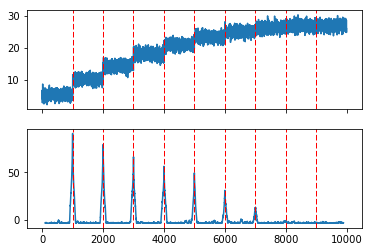

In [24]:
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(x)
for t in t_change:
    axes[0].axvline(t, color='red', linestyle='--', linewidth=1.0)
axes[1].plot(np.array(h*[np.nan] + score + h*[np.nan]))
for t in t_change:
    axes[1].axvline(t, color='red', linestyle='--', linewidth=1.0)
plt.show()

## multiple gradual mean-changing dataset

In [25]:
h = 100
T = 10000
beta = 0.5
t_change = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]

gen_multi_mean = MultipleGradualMeanGenerator()
x = gen_multi_mean.generate(T)
mu_max = 2.0
sigma_min = 1.0

tol_delay = 200
score = calc_score(x, h, T, mu_max, sigma_min)
calc_auc(score, h, tol_delay, t_change)

0.690664234321


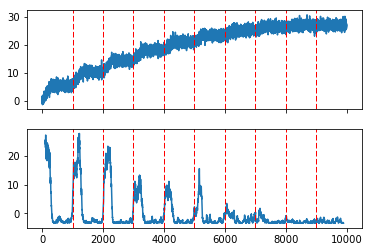

In [26]:
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(x)
for t in t_change:
    axes[0].axvline(t, color='red', linestyle='--', linewidth=1.0)
axes[1].plot(np.array(h*[np.nan] + score + h*[np.nan]))
for t in t_change:
    axes[1].axvline(t, color='red', linestyle='--', linewidth=1.0)
plt.show()

## My multiple gradual mean-changing dataset

In [27]:
h = 100
T = 10000
beta = 0.5
t_change = [1000, 1500, 2500, 3000, 3300, 3500, 4000, 5000, 9000]

gen_multi_mean = MyMultipleGradualMeanGenerator()
x = gen_multi_mean.generate(T)
mu_max = 2.0
sigma_min = 1.0

tol_delay = 200
score = calc_score(x, h, T, mu_max, sigma_min)
calc_auc(score, h, tol_delay, t_change)

0.794411177729


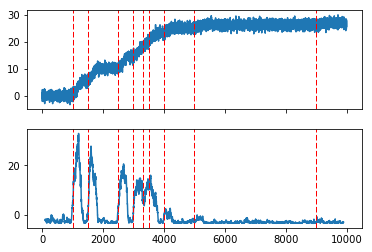

In [28]:
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(x)
for t in t_change:
    axes[0].axvline(t, color='red', linestyle='--', linewidth=1.0)
axes[1].plot(np.array(h*[np.nan] + score + h*[np.nan]))
for t in t_change:
    axes[1].axvline(t, color='red', linestyle='--', linewidth=1.0)
plt.show()

## KDD Cup 1999 dataset

In [29]:
h = 100
T = 10000
beta = 0.5
#t_change = [1000, 1500, 2500, 3000, 3300, 3500, 4000, 5000, 9000]

d = pd.read_csv('../data/literature_processed/KDDCup99/KDDCup99_catremoved.csv')
d.head(3)

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1.0,0.0,105.0,146.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.0,1.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,"b""'no'"""
1,2.0,0.0,105.0,146.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.0,1.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,"b""'no'"""
2,3.0,0.0,105.0,146.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.0,1.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,"b""'no'"""


In [50]:
y = d.ix[:, -1].values
y = np.array([d[3:-2] for d in y])

246

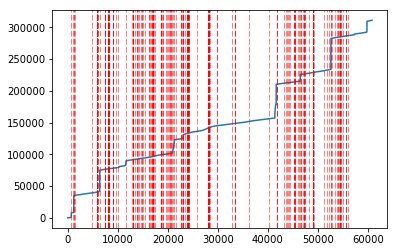

In [52]:
idxes = np.where(y == 'yes')[0]
plt.plot(d.ix[:, 0].values)
for idx in idxes:
    plt.axvline(idx, linestyle='--', linewidth=0.5, color='red')
plt.show()

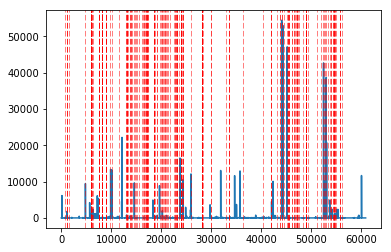

In [53]:
plt.plot(d.ix[:, 1].values)
for idx in idxes:
    plt.axvline(idx, linestyle='--', linewidth=0.5, color='red')
plt.show()

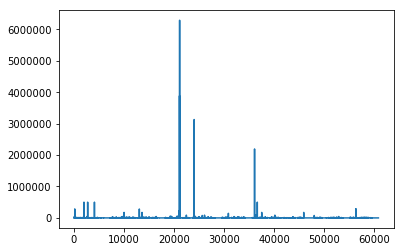

In [32]:
plt.plot(d.ix[:, 2].values)

In [ ]:
mu_max = 2.0
sigma_min = 1.0

tol_delay = 200
score = calc_score(x, h, T, mu_max, sigma_min)
calc_auc(score, h, tol_delay, t_change)